<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [10]:
# importing necessary libraries 

from scipy import stats 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
import numpy as np

**Probability Mass Function (PMF)**

- probability of dicrete random variables
- Suppose, that you have a jar full of lottery balls containing: 
* 50 "1"s
* 25 "2"s
* 15 "3"s
* 10 "4"s

Then we represent the function in a plot like so. 

In [2]:
# for each number, we calculate the probaility that pull it from the jar by dividing 
numbers = range(1,5)
counts = [50,25,15,10]

# calculate the probs by dividing each count by the total number of balls. 
probs = [count/sum(counts) for count in counts]

lotto_dict = {number:prob for number, prob in zip(numbers,probs)}
lotto_dict

{1: 0.5, 2: 0.25, 3: 0.15, 4: 0.1}

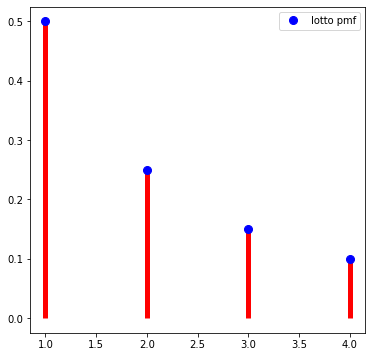

In [3]:
# plot here!
x = list(lotto_dict.keys())
y = list(lotto_dict.values())

fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.plot(x,y,"bo", ms=8, label ="lotto pmf")
ax.vlines(x,0,y,"r", lw=5)
ax.legend(loc="best");

**Uniform Distribution**
- Describes a set of discrete outcomes whose probabilities are equal or likely. eg. roll of a die. 
- The pmf of a discrete uniform distribution is simply: 

$f(x)$ = $\frac{1}{n}$


In [4]:
# expected value for the roll of a 12-sided die

expected_value = sum ([1/12 * n for n in range (1,13)])
print(f"Expected value:{expected_value}")

# variance for a roll of 12-sided die

variance = sum([1/12 * (n - expected_value)**2 for n in range (1,13)])
print(f"Variance:{variance}")

Expected value:6.5
Variance:11.916666666666664


**Probability Desnsity Function**

- For continous random variables.
- Regions of the probability distribution. 

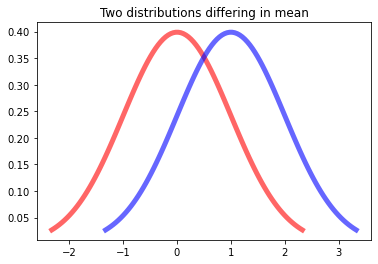

In [12]:
fig, ax = plt.subplots()

mean = 0 
z_curve = np.linspace(stats.norm(mean,1).ppf(0.01),
                      stats.norm(mean,1).ppf(0.99),100)
ax.plot(z_curve, stats.norm(mean,1).pdf(z_curve), 
       'r-', lw=5, alpha=0.6, label='z_curve')

mean = 1
z_curve = np.linspace(stats.norm(mean,1).ppf(0.01),
                      stats.norm(mean,1).ppf(0.99),100)
ax.plot(z_curve, stats.norm(mean,1).pdf(z_curve), 
       'b-', lw=5, alpha=0.6, label='norm pdf')

ax.set_title("Two distributions differing in mean");

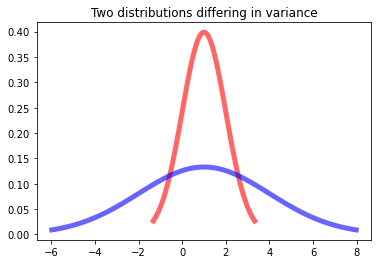

In [16]:
fig, ax = plt.subplots()

mean = 1
var = 1 
z_curve = np.linspace(stats.norm(mean,var).ppf(0.01),
                      stats.norm(mean,var).ppf(0.99),100)
ax.plot(z_curve, stats.norm(mean,var).pdf(z_curve), 
       'r-', lw=5, alpha=0.6, label='z_curve')

mean = 1
var = 3
z_curve = np.linspace(stats.norm(mean,var).ppf(0.01),
                      stats.norm(mean,var).ppf(0.99),100)
ax.plot(z_curve, stats.norm(mean,var).pdf(z_curve), 
       'b-', lw=5, alpha=0.6, label='norm pdf')

ax.set_title("Two distributions differing in variance");

**Cumulative Distribution Frequency**
- align values from least to greatest
- for each value, count the number of values that are less than or equal to the current value
- divide that count by the total number of values

Let's create a CDF for our lotto example. 

In [17]:
lotto_dict = {1: 0.5, 2: 0.25, 3: 0.15, 4: 0.1}
values = list(lotto_dict.keys())

# count the number of values that are less than 
# or equal to the current value

count_less_than_equal = np.cumsum(list(lotto_dict.values()))

# divide by total number of values 
prob_less_than_or_equal = count_less_than_equal/sum(lotto_dict.values())

In [ ]:
fig,ax = plt.subplots()
ax.plot(values, prob_less_than_or_equal, "bo", ms=8, label="lotto pdf")
for i in range (0,5): 
    ax.hlines(prob_less_than_or_equal[i], i, i+1, 'r', lw=5,)
